In [1]:
import pandas as pd

# load the dataset
music_data = pd.read_csv('musicdata.csv')
print(music_data.head())

   Unnamed: 0                                   Track Name  \
0           0                                Bijlee Bijlee   
1           1                                  Expert Jatt   
2           2  Kaun Nachdi (From "Sonu Ke Titu Ki Sweety")   
3           3                                  Na Na Na Na   
4           4                                  Patiala Peg   

                      Artists                         Album Name  \
0               Harrdy Sandhu                      Bijlee Bijlee   
1                       Nawab                        Expert Jatt   
2  Guru Randhawa, Neeti Mohan   High Rated Gabru - Guru Randhawa   
3                      J Star                        Na Na Na Na   
4              Diljit Dosanjh  Do Gabru - Diljit Dosanjh & Akhil   

                 Album ID                Track ID  Popularity Release Date  \
0  3tG0IGB24sRhGFLs5F1Km8  1iZLpuGMr4tn1F5bZu32Kb          70   2021-10-30   
1  2gibg5SCTep0wsIMefGzkd  7rr6n1NFIcQXCsi43P0YNl          65 

In [2]:
music_data.info()
print(music_data.describe())
music_data.isnull().sum()
# dropping the 'Unnamed: 0' column
music_data_cleaned = music_data.drop(columns=['Unnamed: 0'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [3]:
# handling missing values by filling them with placeholder text
columns_with_missing_values = ['Track Name', 'Artists', 'Album Name']
music_data_cleaned[columns_with_missing_values] = music_data_cleaned[columns_with_missing_values].fillna('Unknown')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

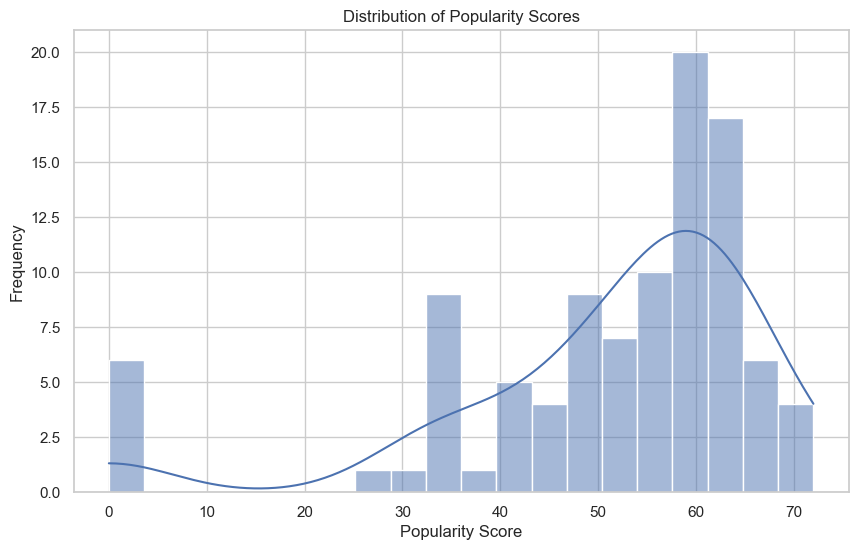

In [4]:
# plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(music_data_cleaned['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

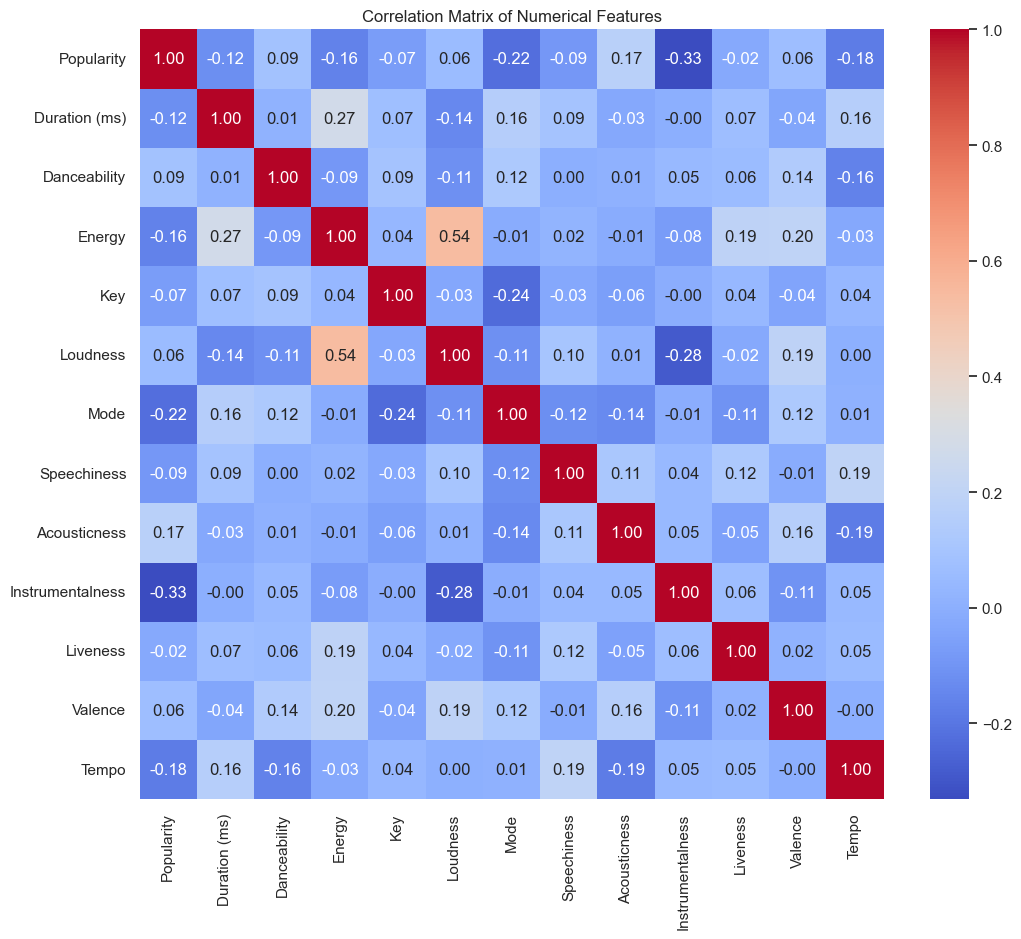

In [5]:
# adding a correlation matrix 
plt.figure(figsize=(12, 10))
correlation_matrix = music_data_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

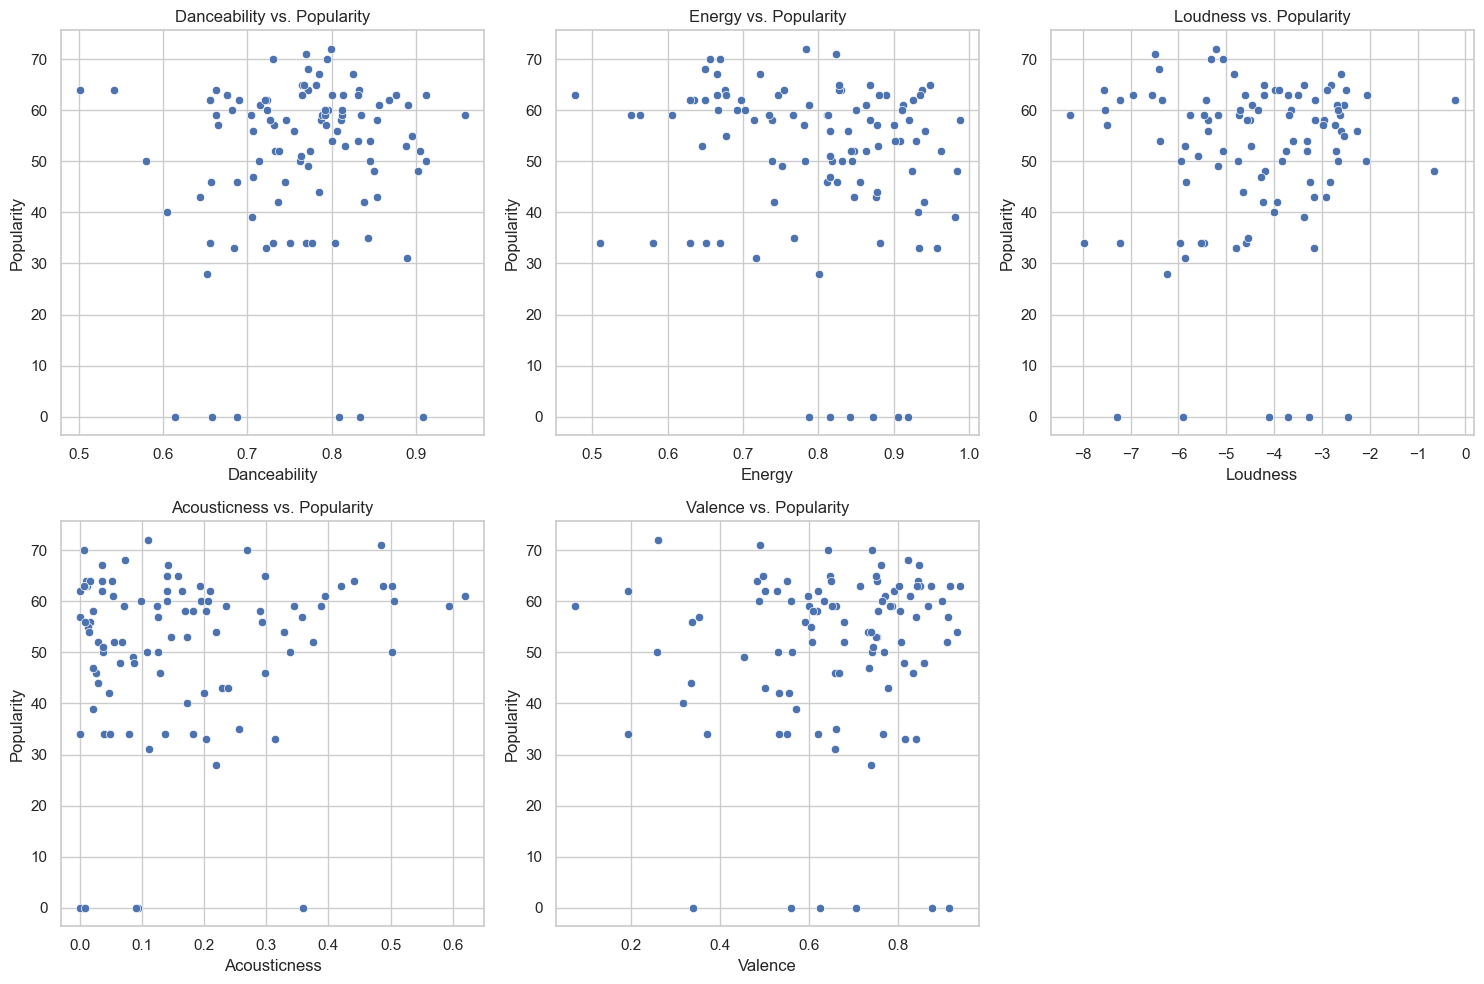

In [6]:
# creating scatter plots for various features vs. popularity
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=music_data_cleaned[feature], y=music_data_cleaned['Popularity'])
    plt.title(f'{feature} vs. Popularity')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

In [7]:
# creating plots for danceability vs. popularity and energy vs. popularity, segmented by explicit content
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

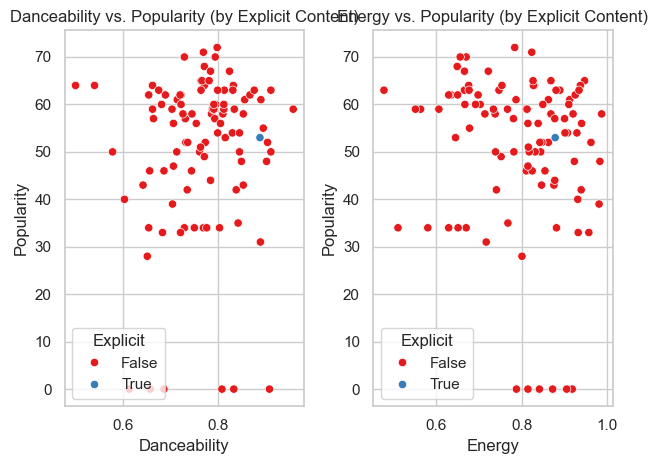

In [8]:
# danceability vs. popularity
plt.subplot(1, 2, 1)
sns.scatterplot(x='Danceability', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Danceability vs. Popularity (by Explicit Content)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# energy vs. popularity
plt.subplot(1, 2, 2)
sns.scatterplot(x='Energy', y='Popularity', hue='Explicit', data=music_data_cleaned, palette='Set1')
plt.title('Energy vs. Popularity (by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

plt.tight_layout()
plt.show()

In [9]:
##setting up dataset & prepping for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# preparing the dataset for regression
# convert 'Explicit' from boolean to integer (0 or 1)
music_data_cleaned['Explicit'] = music_data_cleaned['Explicit'].astype(int)

# selecting features and target for the model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = music_data_cleaned[features]
y = music_data_cleaned['Popularity']

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predicting on the test set
y_pred = model.predict(X_test)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# outputting the coefficients and performance metrics
coefficients = pd.Series(model.coef_, index=features)
print(coefficients)

Danceability        1.249640e+00
Energy             -3.204815e+00
Loudness            1.141456e+00
Acousticness        2.469403e+00
Valence             2.125671e+00
Explicit           -6.661338e-16
Key                -3.189486e+00
Mode               -5.859715e+00
Speechiness         3.398224e-02
Instrumentalness    3.390750e-01
Tempo              -1.865736e+00
dtype: float64
